In [ ]:
import IPython.display as ipd
import math 
from keras.models import load_model
import numpy as np
import librosa
import matplotlib.pyplot as plt

In [ ]:
#To use this denoising notebook, set a path to the denoiser model and to the noisy audio.
#After that, run all the cells.

MODELPATH = "/content/modelv14-15-0.0337.hdf5"
NOISY_PATH = "/content/p232_024.wav"
CLEAN_PATH = "/content/p232_024cln.wav"

In [ ]:
model = load_model(MODELPATH)

In [18]:
TARGET_SR=16000
SLICE_SIZE=2048

def peak_amplitude(samples):
    return max(abs(np.min(samples)), abs(np.max(samples)))

def _model_predict(slice):
    return np.array(model.predict(slice.reshape((1, SLICE_SIZE)))[0]).reshape((SLICE_SIZE))

def _denoise_audio(audio, result):
    slice_count = audio.shape[0] // SLICE_SIZE
    for i in range(0, slice_count * SLICE_SIZE, SLICE_SIZE):
        result[i:i+SLICE_SIZE] += _model_predict(audio[i:i+SLICE_SIZE])
        
def denoise_audio(audio):
    peak = peak_amplitude(audio)
    npad = math.ceil(audio.shape[0] / SLICE_SIZE) * SLICE_SIZE
    padded = np.pad(audio, (0, npad), 'reflect')
    result = np.zeros(padded.shape)
    _denoise_audio(padded / peak, result)
    return result[:audio.shape[0]] * peak

def denoise_audio_multiple(audio, n=8):
    peak = peak_amplitude(audio)
    result = np.zeros((audio.shape[0] + SLICE_SIZE))
    for offset in range(0, SLICE_SIZE - 1, SLICE_SIZE // n):
        _denoise_audio(audio[offset:] / peak, result[offset:])
    clipped = result[:audio.shape[0]]
    average = clipped / math.ceil(SLICE_SIZE / (SLICE_SIZE // n))
    return average  * peak

def denoise_noisy_file():
    tsr = TARGET_SR
    noisy_res, _ = librosa.load(NOISY_PATH, sr=tsr, res_type='kaiser_best')
    result = denoise_audio(noisy_res)
    noisy, sr = librosa.load(NOISY_PATH)
    print('Original audio:')
    ipd.display(ipd.Audio(noisy_res, rate=tsr))
    print('Denoised audio:')
    ipd.display(ipd.Audio(result, rate=tsr))
    print('Noise:')
    ipd.display(ipd.Audio(noisy_res - result, rate=tsr))

def denoise_and_compare():
    tsr = TARGET_SR
    noisy_res, _ = librosa.load(NOISY_PATH, sr=tsr, res_type='kaiser_best')
    clean_res, _ = librosa.load(CLEAN_PATH, sr=tsr, res_type='kaiser_best')
    result = denoise_audio(noisy_res)
    noisy, sr = librosa.load(NOISY_PATH)
    print('Original audio:')
    ipd.display(ipd.Audio(noisy_res, rate=tsr))
    plt.plot(noisy_res)
    plt.show()
    plt.specgram(noisy_res, Fs=tsr)
    plt.show()
    print('Denoised audio:')
    ipd.display(ipd.Audio(result, rate=tsr))
    plt.plot(result)
    plt.show()
    plt.specgram(result, Fs=tsr)
    plt.show()
    print('Clean audio:')
    ipd.display(ipd.Audio(clean_res, rate=tsr))
    plt.plot(clean_res)
    plt.show()
    plt.specgram(clean_res, Fs=tsr)
    plt.show()
    print('Noise:')
    ipd.display(ipd.Audio(noisy_res - result, rate=tsr))
    plt.plot(noisy_res-result)
    plt.show()
    plt.specgram(noisy_res-result, Fs=tsr)
    plt.show()
    print('Original Noise:')
    ipd.display(ipd.Audio(noisy_res - clean_res, rate=tsr))
    plt.plot(noisy_res-clean_res)
    plt.show()
    plt.specgram(noisy_res-clean_res, Fs=tsr)
    plt.show()

Original audio:


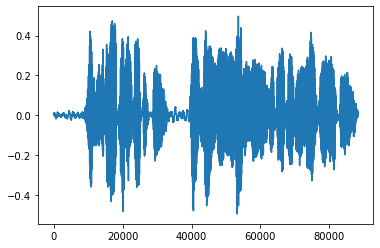

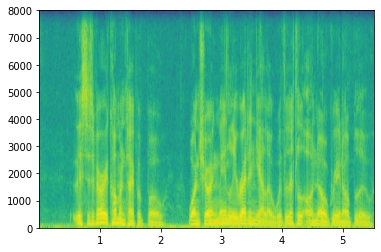

Denoised audio:


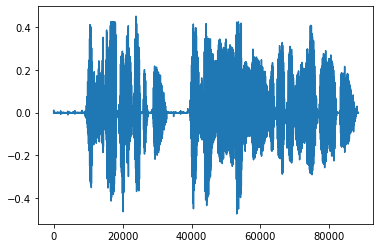

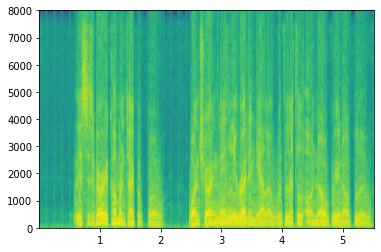

Clean audio:


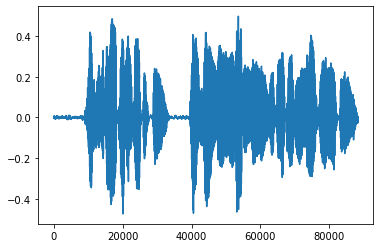

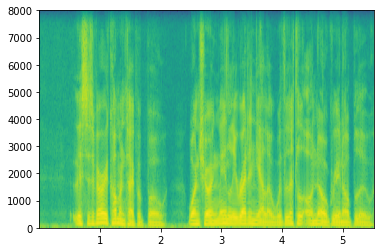

Noise:


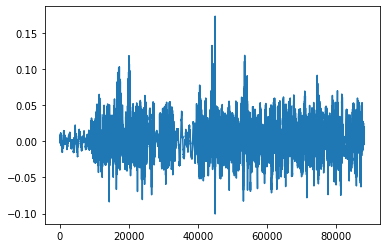

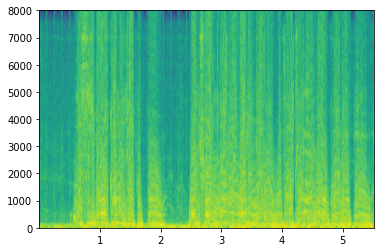

Original Noise:


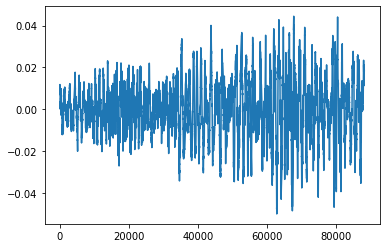

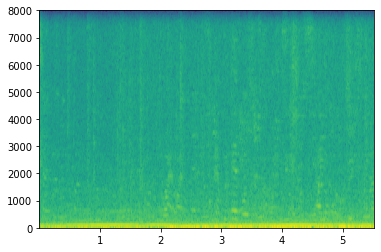

In [19]:
denoise_and_compare()